In [2]:
# Install the required libraries if you haven't already
# !pip install rasterio geopandas numpy matplotlib

import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

# # --- Display plots inline in the notebook ---
# %matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:

import os
import geopandas as gpd

# --- STEP 1: Define the absolute path to your main project folder ---
project_root = "/Users/chaitanyakartik/Projects/AgroSpectra"

# --- STEP 2: Build the rest of the paths automatically ---
data_root = os.path.join(project_root, "data", "Sentinel2-Hyperspectral", "EO_Browser_images")

# We'll process the data for January 10th
date_folder = 'Korba_Coal_AOI1_Jan10'
data_dir = os.path.join(data_root, date_folder)

# --- Define the base filename WITH THE CORRECT COLONS ---
base_filename = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A' # <-- NOTE THE COLONS

# --- Construct the full, correct paths ---
b4_path = os.path.join(data_dir, f'{base_filename}_B04_(Raw).tiff')
b8_path = os.path.join(data_dir, f'{base_filename}_B08_(Raw).tiff')
b11_path = os.path.join(data_dir, f'{base_filename}_B11_(Raw).tiff')

# --- STEP 3: Define the path to your AOI file ---
aoi_path = os.path.join(project_root, '/Users/chaitanyakartik/Projects/AgroSpectra/data/GoogleEarth/Korba_Coal_AOI_1.kml')

# --- Load the AOI ---
try:
    aoi_gdf = gpd.read_file(aoi_path, driver='KML')
    print("AOI loaded successfully.")
except Exception as e:
    print(f"Error loading AOI: {e}")
    print("Please ensure the path is correct and you have the necessary drivers.")

# Open the files using rasterio
src_b4 = rasterio.open(b4_path)
src_b8 = rasterio.open(b8_path)
src_b11 = rasterio.open(b11_path)

# Read the data into numpy arrays
# We convert to float32 to allow for decimal calculations
b4 = src_b4.read(1).astype('float32')
b8 = src_b8.read(1).astype('float32')
b11 = src_b11.read(1).astype('float32')

# Sentinel-2 L2A data has a scaling factor. We should apply it.
# The digital numbers are typically scaled by 10000.
b4 /= 10000
b8 /= 10000
b11 /= 10000

print("Bands B4, B8, and B11 read into memory and scaled.")
print("Array shape:", b4.shape)

AOI loaded successfully.


In [5]:
# --- Calculate NDVI ---
# Add a small number to the denominator to avoid division by zero
numerator = b8 - b4
denominator = b8 + b4 + 1e-9 # 1e-9 is a very small number (epsilon)

ndvi = numerator / denominator

# --- Set invalid values (e.g., from division by zero) to NaN ---
ndvi[np.isinf(ndvi)] = np.nan

print("NDVI calculated. Values range from -1 to 1.")


# --- Calculate approximated BSI (Bare Soil Index) ---
numerator_bsi = (b11 + b4) - b8
denominator_bsi = (b11 + b4) + b8 + 1e-9

bsi = numerator_bsi / denominator_bsi

# --- Set invalid values to NaN ---
bsi[np.isinf(bsi)] = np.nan

print("Approximated BSI calculated. Values range from -1 to 1.")


NDVI calculated. Values range from -1 to 1.
Approximated BSI calculated. Values range from -1 to 1.


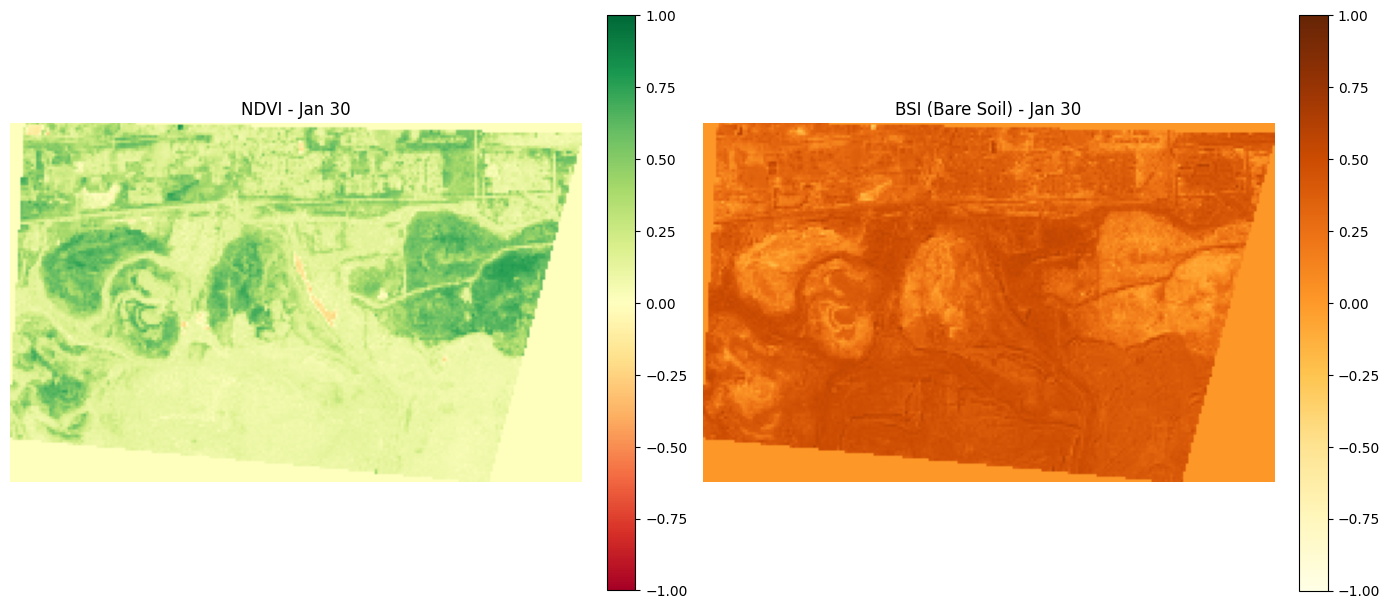

In [6]:
# --- Plotting the results side-by-side ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot NDVI
im1 = ax1.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
ax1.set_title('NDVI - Jan 30')
ax1.set_axis_off()
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Plot NDBI
im2 = ax2.imshow(bsi, cmap='YlOrBr', vmin=-1, vmax=1)
ax2.set_title('BSI (Bare Soil) - Jan 30')
ax2.set_axis_off()
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [7]:
# --- Define paths for the January 10th data ---
date_folder_jan10 = 'Korba_Coal_AOI1_Jan10'
data_dir_jan10 = os.path.join(data_root, date_folder_jan10)
base_filename_jan10 = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A'

b4_path_jan10 = os.path.join(data_dir_jan10, f'{base_filename_jan10}_B04_(Raw).tiff')
b8_path_jan10 = os.path.join(data_dir_jan10, f'{base_filename_jan10}_B08_(Raw).tiff')
b11_path_jan10 = os.path.join(data_dir_jan10, f'{base_filename_jan10}_B11_(Raw).tiff')

# --- Define paths for the January 30th data ---
date_folder_jan30 = 'Korba_Coal_AOI1_Jan30'
data_dir_jan30 = os.path.join(data_root, date_folder_jan30)
base_filename_jan30 = '2023-01-30-00:00_2023-01-30-23:59_Sentinel-2_L2A'

b4_path_jan30 = os.path.join(data_dir_jan30, f'{base_filename_jan30}_B04_(Raw).tiff')
b8_path_jan30 = os.path.join(data_dir_jan30, f'{base_filename_jan30}_B08_(Raw).tiff')
b11_path_jan30 = os.path.join(data_dir_jan30, f'{base_filename_jan30}_B11_(Raw).tiff')

# --- Read all bands into memory and scale them ---
def read_and_scale_band(path):
    with rasterio.open(path) as src:
        # Save the metadata for later
        meta = src.meta
        # Read and scale the data
        band = src.read(1).astype('float32') / 10000
        return band, meta

# Load Jan 10 data
b4_jan10, meta = read_and_scale_band(b4_path_jan10)
b8_jan10, _ = read_and_scale_band(b8_path_jan10)
b11_jan10, _ = read_and_scale_band(b11_path_jan10)

# Load Jan 30 data
b4_jan30, _ = read_and_scale_band(b4_path_jan30)
b8_jan30, _ = read_and_scale_band(b8_path_jan30)
b11_jan30, _ = read_and_scale_band(b11_path_jan30)


print("Data for both Jan 10 and Jan 30 loaded successfully.")

Data for both Jan 10 and Jan 30 loaded successfully.


In [8]:
# --- Function to calculate NDVI ---
def calculate_ndvi(b8, b4):
    return (b8 - b4) / (b8 + b4 + 1e-9)

# --- Function to calculate approximated BSI ---
def calculate_bsi_approx(b11, b8, b4):
    return (b11 + b4 - b8) / (b11 + b4 + b8 + 1e-9)

# --- Calculate indices for January 10th ---
ndvi_jan10 = calculate_ndvi(b8_jan10, b4_jan10)
bsi_jan10 = calculate_bsi_approx(b11_jan10, b8_jan10, b4_jan10)

# --- Calculate indices for January 30th ---
ndvi_jan30 = calculate_ndvi(b8_jan30, b4_jan30)
bsi_jan30 = calculate_bsi_approx(b11_jan30, b8_jan30, b4_jan30)

print("NDVI and BSI calculated for both dates.")

NDVI and BSI calculated for both dates.


Difference maps for NDVI and BSI computed.
NDVI Difference stats: min = -0.38550395 , max = 0.26618612
BSI Difference stats: min = -0.27749556 , max = 0.46534792


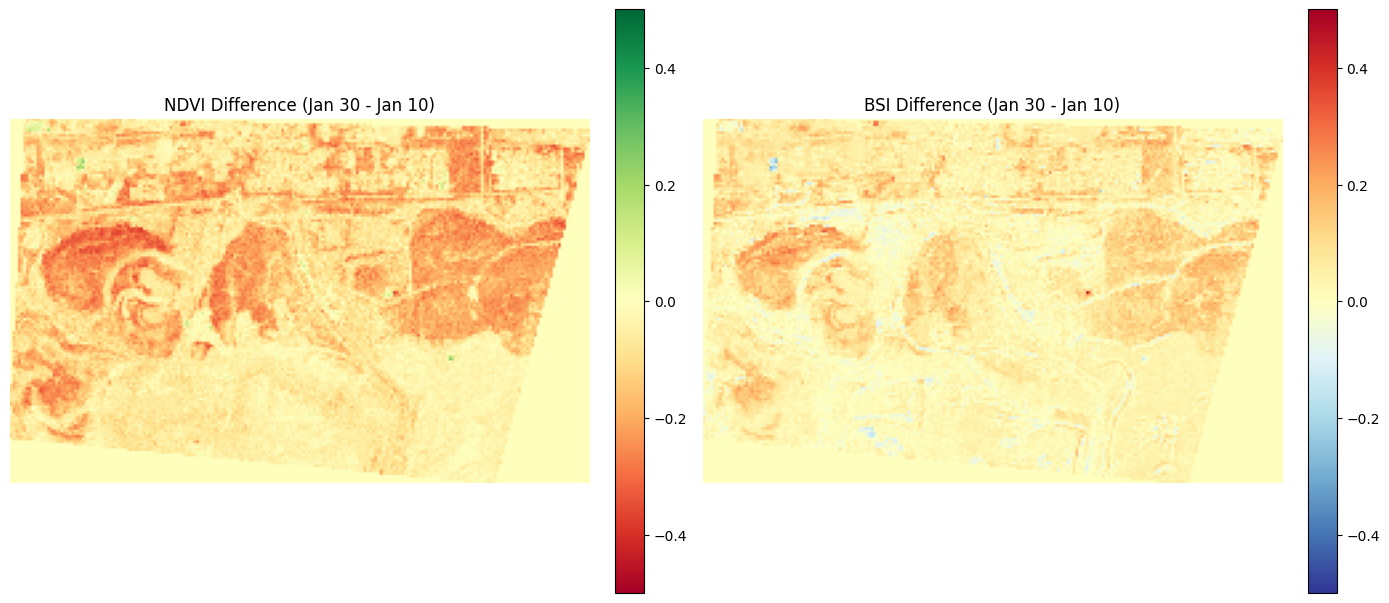

In [9]:
# --- Calculate the difference maps ---
# A positive value means the index increased from Jan 10 to Jan 30
ndvi_diff = ndvi_jan30 - ndvi_jan10
bsi_diff = bsi_jan30 - bsi_jan10

print("Difference maps for NDVI and BSI computed.")

print("NDVI Difference stats: min =", np.nanmin(ndvi_diff), ", max =", np.nanmax(ndvi_diff))
print("BSI Difference stats: min =", np.nanmin(bsi_diff), ", max =", np.nanmax(bsi_diff))


# --- Plotting the difference maps side-by-side ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot NDVI Difference
# Green = vegetation gain, Red = vegetation loss
im1 = ax1.imshow(ndvi_diff, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
ax1.set_title('NDVI Difference (Jan 30 - Jan 10)')
ax1.set_axis_off()
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Plot BSI Difference
# Red/Yellow = more bare soil, Blue = less bare soil
im2 = ax2.imshow(bsi_diff, cmap='RdYlBu_r', vmin=-0.5, vmax=0.5)
ax2.set_title('BSI Difference (Jan 30 - Jan 10)')
ax2.set_axis_off()
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()



# Interpretation: In the BSI difference map, bright red/yellow areas
# indicate an increase in bare soil, which could be a sign of new mining activity.

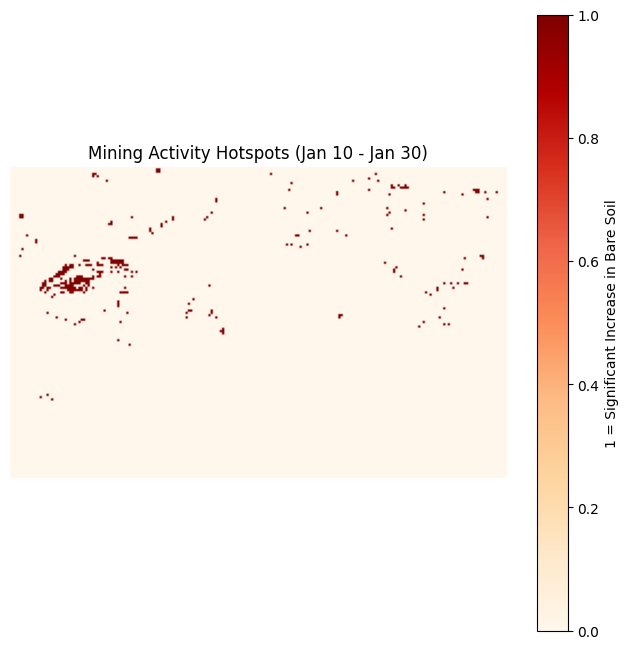

In [10]:
# --- Define a threshold for significant change ---
# We'll say any area where BSI increased by more than 0.2 is a "hotspot"
bsi_threshold = 0.2

# --- Create a boolean mask of the hotspots ---
change_hotspots = bsi_diff > bsi_threshold

# --- Plot the hotspot map ---
plt.figure(figsize=(8, 8))
plt.imshow(change_hotspots, cmap='OrRd') # Use a simple colormap
plt.title('Mining Activity Hotspots (Jan 10 - Jan 30)')
plt.colorbar(label='1 = Significant Increase in Bare Soil')
plt.axis('off')
plt.show()

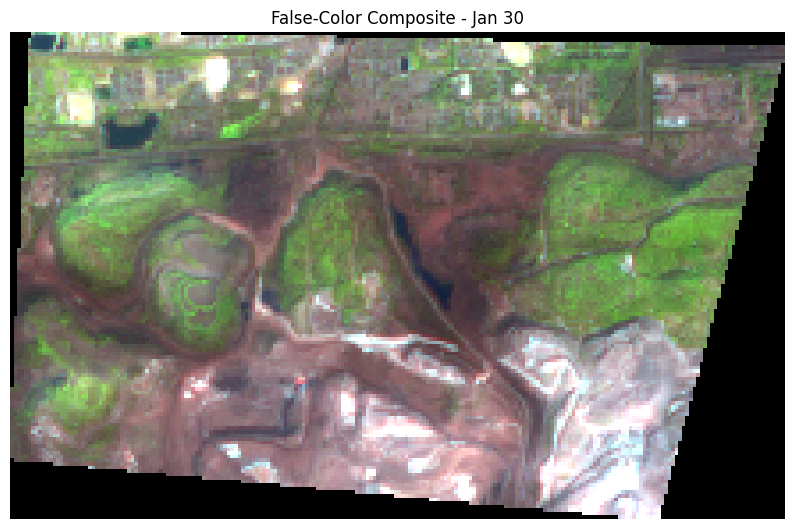

In [11]:
# --- Function to normalize a band for visualization (contrast stretching) ---
def normalize(band):
    band_min, band_max = np.percentile(band, 2), np.percentile(band, 98)
    return ((band - band_min) / (band_max - band_min)).clip(0, 1)

# --- Normalize the bands from Jan 30 for better color ---
b11_norm = normalize(b11_jan30)
b8_norm = normalize(b8_jan30)
b4_norm = normalize(b4_jan30)

# --- Stack the bands to create an RGB image ---
false_color_composite = np.dstack((b11_norm, b8_norm, b4_norm))

# --- Plot the false-color composite ---
plt.figure(figsize=(10, 10))
plt.imshow(false_color_composite)
plt.title('False-Color Composite - Jan 30')
plt.axis('off')
plt.show()

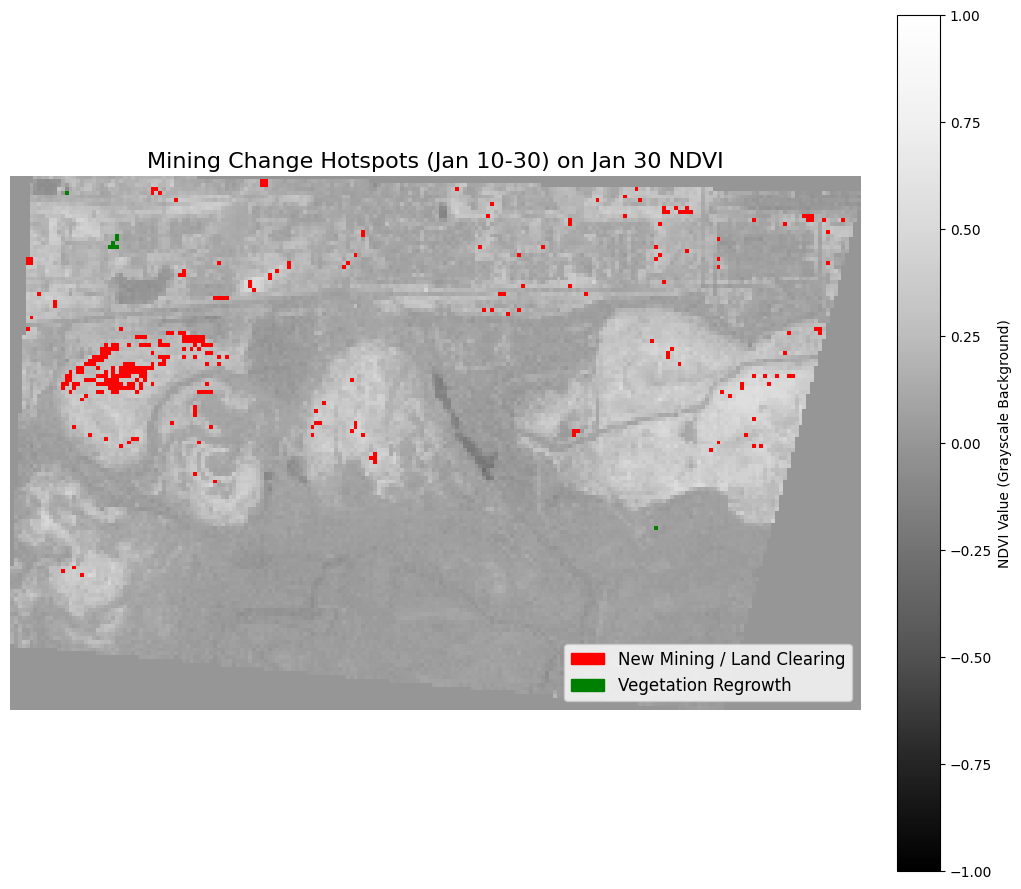

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# --- Define thresholds ---
BSI_INCREASE_THRESHOLD = 0.2
NDVI_INCREASE_THRESHOLD = 0.15

# --- Create a FLOAT array initialized with NaN ---
# NaN (Not a Number) will be treated as transparent by the plot
classified_change = np.full(bsi_diff.shape, np.nan, dtype=np.float32) # Key change: float dtype and NaN

# --- Apply classification rules ---
# Rule 1: New Mining/Clearing
classified_change[bsi_diff > BSI_INCREASE_THRESHOLD] = 1

# Rule 2: Vegetation Regrowth
classified_change[(ndvi_diff > NDVI_INCREASE_THRESHOLD) & (bsi_diff < BSI_INCREASE_THRESHOLD)] = 2

# --- Create the custom colormap and legend ---
cmap = ListedColormap(['red', 'green']) # Simpler cmap as we only have values 1 and 2
legend_patches = [mpatches.Patch(color='red', label='New Mining / Land Clearing'),
                  mpatches.Patch(color='green', label='Vegetation Regrowth')]

# --- Create the final map ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Display the Jan 30 NDVI as a grayscale background (zorder=1)
im = ax.imshow(ndvi_jan30, cmap='Greys_r', vmin=-1, vmax=1, zorder=1)
ax.set_title('Mining Change Hotspots (Jan 10-30) on Jan 30 NDVI', fontsize=16)
ax.set_axis_off()

# Overlay the classified change directly. No masking needed! (zorder=2)
# Matplotlib will automatically not plot the NaN values.
ax.imshow(classified_change, cmap=cmap, vmin=1, vmax=2, zorder=2)

# Add legend and colorbar
ax.legend(handles=legend_patches, loc='lower right', frameon=True, fontsize=12)
fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04, label='NDVI Value (Grayscale Background)')

plt.show()
plt.close()

In [18]:
import os
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

# --- Use the paths you already defined ---
# (Assuming your path setup code from before is here)
b4_path = os.path.join(data_dir, f'{base_filename}_B04_(Raw).tiff')

# --- Define the path for the NEW reprojected file ---
b4_reprojected_path = os.path.join(data_dir, f'{base_filename}_B04_(Reprojected).tiff')

# --- Reprojection Code ---
# Find the correct UTM zone for your area (e.g., 'EPSG:32643' for Korba, India)
dst_crs = 'EPSG:32643'

with rasterio.open(b4_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(b4_reprojected_path, 'w', **kwargs) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest)

print(f"Reprojection of Band 4 complete. New file: {b4_reprojected_path}")

Reprojection of Band 4 complete. New file: /Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel2-Hyperspectral/EO_Browser_images/Korba_Coal_AOI1_Jan10/2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B04_(Reprojected).tiff


In [19]:
import numpy as np

# --- Get pixel resolution from the metadata (it's in degrees) ---
pixel_width_deg = meta['transform'][0]
pixel_height_deg = abs(meta['transform'][4]) # Height is often negative

# --- Get the central latitude of your raster for accuracy ---
# (bottom_lat + top_lat) / 2
center_lat_deg = (meta['bounds'][1] + meta['bounds'][3]) / 2 

# --- Approximate the area of one pixel in square meters ---
# Convert degrees to meters
m_per_deg_lat = 111132.954 
m_per_deg_lon = 111320 * np.cos(np.radians(center_lat_deg))

pixel_width_m = pixel_width_deg * m_per_deg_lon
pixel_height_m = pixel_height_deg * m_per_deg_lat

pixel_area_m2 = pixel_width_m * pixel_height_m

# --- Your original calculation code now works ---
mining_pixel_count = np.count_nonzero(classified_change == 1)
mining_area_m2 = mining_pixel_count * pixel_area_m2
mining_area_ha = mining_area_m2 / 10000

print(f"The total mining/clearing area is approximately {mining_area_ha:.2f} hectares.")

KeyError: 'bounds'

/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_4316/2971346321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=areas, palette=['red', 'green'])
/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_4316/2971346321.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_4316/2971346321.py:22: MatplotlibDeprecationWarning: The y parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(y) instead.
  plt.savefig("land_cover_change_area.png", dpi=300)


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: typing.SupportsInt, height: typing.SupportsInt, dpi: typing.SupportsFloat)

Invoked with: 678, 46812908977, 100.0

<Figure size 800x600 with 1 Axes>

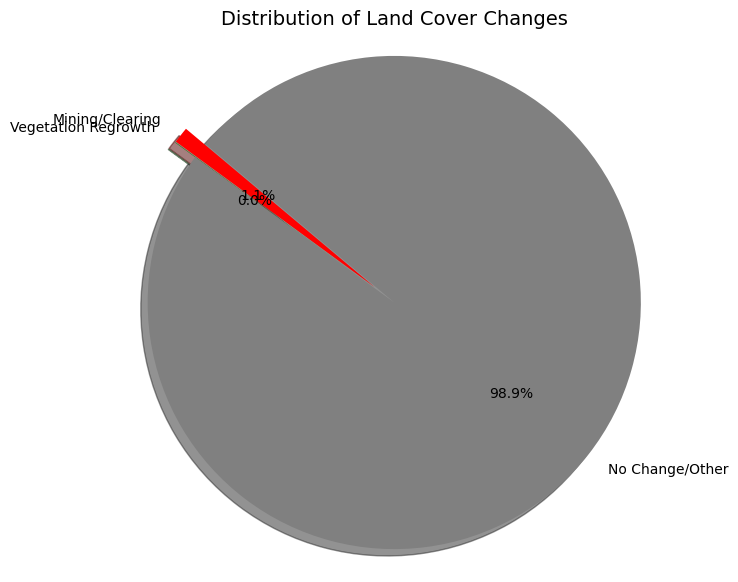

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare data ---
categories = ['Mining/Clearing', 'Vegetation Regrowth']
areas = [float(mining_area_ha), float(vegetation_area_ha)]

# --- Bar Plot ---
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=areas, palette=['red', 'green'])

# Add annotations
for i, val in enumerate(areas):
    plt.text(i, val + 0.1, f"{val:.2f} ha", ha='center', va='bottom', fontsize=11)

plt.title("Land Cover Change Analysis", fontsize=14)
plt.ylabel("Area (hectares)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("land_cover_change_area.png", dpi=300)
plt.show()
plt.close()

# --- Pie Chart ---
labels = ['Mining/Clearing', 'Vegetation Regrowth', 'No Change/Other']
no_change_area_ha = (
    (classified_change.size - mining_pixel_count - vegetation_pixel_count)
    * pixel_area_m2 / 10000
)

sizes = [float(mining_area_ha), float(vegetation_area_ha), float(no_change_area_ha)]
colors = ['red', 'green', 'gray']
explode = (0.1, 0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(
    sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140
)
plt.axis("equal")
plt.title("Distribution of Land Cover Changes", fontsize=14)

plt.savefig("land_cover_change_distribution.png", dpi=300)
plt.show()
plt.close()
